In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, mean_squared_error, r2_score
from scipy.stats import chi2

In [54]:
df = pd.read_excel("Задания/Datasets/Doctor.xlsx")
df.columns = ['y', 'x1', 'x2', 'x3', 'x4', 'x5']
print(df.shape)
df = df.fillna(df.mean())
df.head(20)

(58, 6)


,y,x1,x2,x3,x4,x5
0,0,14,4.30,1.00,2,3.72
1,0,12,11.54,8.49,3,40.28
2,0,14,5.84,2.47,3,56.00
3,1,11,14.70,6.60,1,57.41
4,0,21,5.10,3.48,1,83.00
5,0,12,6.14,3.09,1,62.57
6,1,17,5.05,1.14,3,22.16
7,1,12,11.30,8.85,1,12.00
8,0,14,3.30,1.20,3,110.00
9,1,19,6.60,4.30,1,2.96


In [55]:
#1
df.describe()

,y,x1,x2,x3,x4,x5
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.637931,16.327586,10.327931,7.141379,2.344828,45.135000
std,0.484796,3.213939,3.957742,3.749343,0.928151,53.956171
min,0.000000,11.000000,3.300000,1.000000,1.000000,0.800000
25%,0.000000,14.000000,6.375000,3.985000,1.000000,22.115000
50%,1.000000,16.000000,10.450000,6.835000,3.000000,38.935000
75%,1.000000,19.000000,13.400000,9.975000,3.000000,53.125000
max,1.000000,27.000000,19.000000,16.000000,3.000000,399.800000


### describe аналогичен функцие summary, также можно показать describe для категориальных признаков 


In [56]:
# df.describe(include=['O'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       58 non-null     int64  
 1   x1      58 non-null     int64  
 2   x2      58 non-null     float64
 3   x3      58 non-null     float64
 4   x4      58 non-null     int64  
 5   x5      58 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.8 KB


In [58]:
#2
data = df.copy()
data['y'] = pd.Categorical(df['y'])
data['x4'] = pd.Categorical(df['x4'])

### Мы используем функцию factor, чтобы сделать эту переменную категориальной.

In [59]:
df.head(5)

,y,x1,x2,x3,x4,x5
0,0,14,4.30,1.00,2,3.72
1,0,12,11.54,8.49,3,40.28
2,0,14,5.84,2.47,3,56.00
3,1,11,14.70,6.60,1,57.41
4,0,21,5.10,3.48,1,83.00


### Построим базовую логистичесскую регрессию чтобы было нагляднее видно почему нельзя ее применять

In [60]:
X = df.drop('y', axis=1)  
y = df['y']     

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.17339234418517346
R² Score: 0.2866143553524293


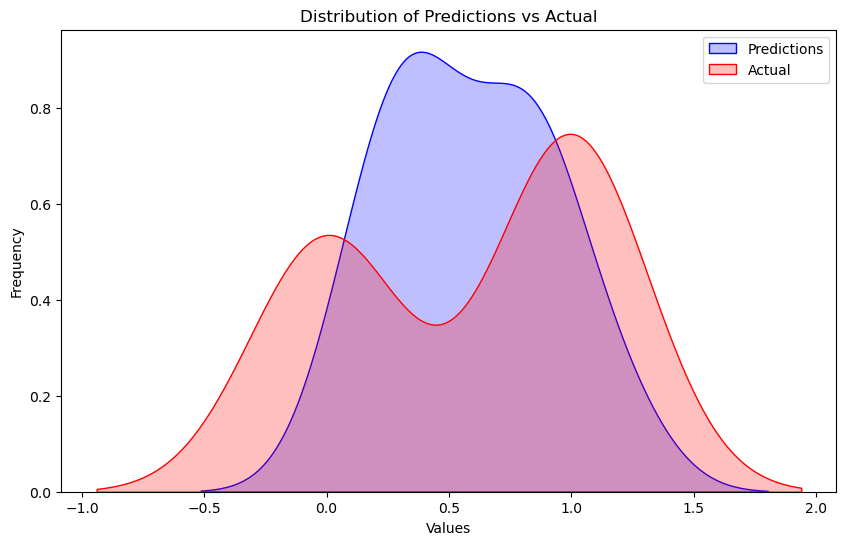

In [62]:
model = LinearRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
# Plot the distribution of predicted and actual values using Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(predictions, color="blue", label="Predictions", fill=True)
sns.kdeplot(y_test, color="red", label="Actual", fill=True)

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions vs Actual")
plt.legend()

plt.show()

In [63]:
data['y'] = data['y'].cat.codes
data['x4'] = data['x4'].cat.codes

Model accuracy: 0.75
Confusion matrix:
[[4 1]
 [2 5]]
Classification report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.83      0.71      0.77         7

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



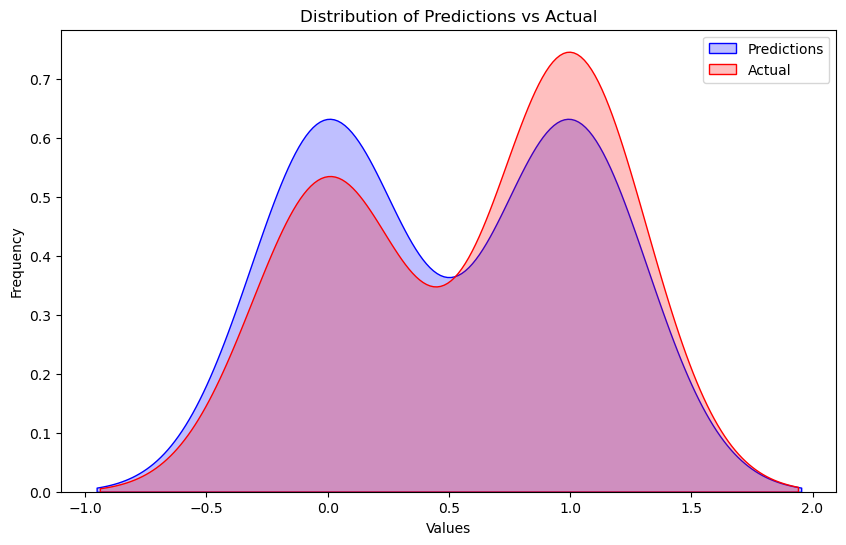

In [64]:
#3
X = data.drop(columns='y')
X = sm.add_constant(X)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model on the training data
model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

y_pred = model.predict(X_test)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]  # Converting probabilities to binary classes

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f"Model accuracy: {accuracy}")
print("Confusion matrix:")
print(conf_matrix)
print("Classification report:")
print(class_report)

plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_binary, color="blue", label="Predictions", fill=True)
sns.kdeplot(y_test, color="red", label="Actual", fill=True)

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions vs Actual")
plt.legend()

plt.show()

# 4
# Бинарная логистическая регрессия

## Уравнение логистической регрессии

Общая форма уравнения для бинарной логистической регрессии:

$$
\text{logit}(p) = \ln\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

Где:
- $p$ — вероятность принадлежности к классу 1.
- $\beta_0$ — свободный член (intercept).
- $\beta_1, \beta_2, \dots, \beta_n$ — коэффициенты регрессии для соответствующих признаков $X_1, X_2, \dots, X_n$.
- $X_1, X_2, \dots, X_n$ — значения предикторов (признаков).

In [65]:
coeff = model.params
print("model coeff:")
for variable, coef in coeff.items():
    print(f"{variable}: {coef:.6f}")

model coeff:
const: -10.385194
x1: 0.550837
x2: 0.300564
x3: 0.182532
x4: 0.205172
x5: -0.051326


$$
\text{logit}(p) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5
$$
- $\beta_0$ = -10.385194  (свободный член)
- $\beta_1$ = 0.550837  (коэффициент для  X_1 )
- $\beta_2$ = 0.300564  (коэффициент для  X_2 )
- $\beta_3$ = 0.182532  (коэффициент для  X_3 )
- $\beta_4$ = 0.205172  (коэффициент для  X_4 )
- $\beta_5$ = -0.051326  (коэффициент для  X_5 )
$$
\text{logit}(p) = -10.385194 + 0.550837 \cdot X_1 + 0.300564 \cdot X_2 + 0.182532 \cdot X_3 + 0.205172 \cdot X_4 - 0.051326 \cdot X_5
$$

In [66]:
#5
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:                            GLM   Df Residuals:                       40
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.349
Date:                Wed, 23 Oct 2024   Deviance:                       28.698
Time:                        15:10:51   Pearson chi2:                     47.4
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4874
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3852      4.711     -2.204      0.028     -19.619      -1.151
x1             0.5508      0.231      2.382      0.017       0.098       1.004
x2             0.3006      0.682      0.440      0.660      -1.037       1.638
x3             0.1825      0.668      0.273      0.785      -1.127       1.492
x4             0.2052      0.576      0.356      0.722      -0.924       1.335
x5            -0.0513      0.031     -1.631      0.103      -0.113       0.010
==============================================================================
"""

In [67]:
def stepwise_selection_with_aic(X, y, initial_features):
    included = list(initial_features)
    best_aic = float('inf')

    while True:
        changed = False

        # Evaluating the current model
        X_with_const = sm.add_constant(X[included])
        model = sm.OLS(y, X_with_const).fit()
        current_aic = model.aic

        # Check for removal of features
        for feature in included:
            X_temp = X_with_const.drop(columns=feature)
            model_temp = sm.OLS(y, X_temp).fit()
            if model_temp.aic < current_aic:
                included.remove(feature)
                current_aic = model_temp.aic
                changed = True
                print(f"Removed {feature} with AIC {model_temp.aic:.4f}")
                break

        # Check for addition of features
        for feature in X.columns:
            if feature not in included:
                X_temp = X_with_const.copy()
                X_temp[feature] = X[feature]
                model_temp = sm.OLS(y, X_temp).fit()
                if model_temp.aic < current_aic:
                    included.append(feature)
                    changed = True
                    print(f"Added {feature} with AIC {model_temp.aic:.4f}")
                    break

        if not changed:
            break

    return included

In [68]:
# Initializing initial features (all features)
initial_features = X_train.columns.tolist()
selected_features = stepwise_selection_with_aic(X_train, y_train, initial_features)
X_train_clear = sm.add_constant(X_train[selected_features])
X_test_clear = sm.add_constant(X_test[selected_features])

Removed x2 with AIC 41.4305
Removed x4 with AIC 39.5081


In [69]:

# Обучаем модель логистической регрессии на тренировочных данных
model = sm.GLM(y_train, X_train_clear, family=sm.families.Binomial()).fit()

In [70]:
# 6
# Log-likelihood of the full model
ll_full = model.llf

# Fit a null model (intercept only)
null_model = sm.GLM(y_train, np.ones_like(y_train), family=sm.families.Binomial()).fit()
ll_null = null_model.llf

# Likelihood Ratio Test statistic
likelihood_ratio_statistic = -2 * (ll_null - ll_full)

# Degrees of freedom (number of predictors)
degrees_of_freedom = len(model.params) - 1  # Subtracting one for the intercept

# Calculate p-value from chi-squared distribution
p_value = chi2.sf(likelihood_ratio_statistic, degrees_of_freedom)

print("Likelihood Ratio Test Statistic:", likelihood_ratio_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)

if p_value > 0.05:
    conclusion = (
        f"Likelihood Ratio Test Results:\n"
        f"-------------------------------\n"
        f"Likelihood Ratio Test Statistic: {likelihood_ratio_statistic:.2f}\n"
        f"Degrees of Freedom: {degrees_of_freedom}\n"
        f"P-value: {p_value:.2e}\n\n"
        "Conclusion:\n"
        "Since the p-value is greater than the significance level of 0.05, we cannot reject the null hypothesis.\n"
        "This indicates that there is not enough evidence to conclude that any of the predictors in the model are significantly related to the dependent variable."
    )
else:
    conclusion = (
        f"Likelihood Ratio Test Results:\n"
        f"-------------------------------\n"
        f"Likelihood Ratio Test Statistic: {likelihood_ratio_statistic:.2f}\n"
        f"Degrees of Freedom: {degrees_of_freedom}\n"
        f"P-value: {p_value:.2e}\n\n"
        "Conclusion:\n"
        "Since the p-value is significantly less than the significance level of 0.05, we reject the null hypothesis.\n"
        "This indicates that at least one of the predictors in the model is significantly related to the dependent variable,\n"
        "which suggests that the model provides a significantly better fit to the data compared to the null model."
    )

print(conclusion)

Likelihood Ratio Test Statistic: 30.31962820290524
Degrees of Freedom: 3
P-value: 1.1820958677978299e-06
Likelihood Ratio Test Results:
-------------------------------
Likelihood Ratio Test Statistic: 30.32
Degrees of Freedom: 3
P-value: 1.18e-06

Conclusion:
Since the p-value is significantly less than the significance level of 0.05, we reject the null hypothesis.
This indicates that at least one of the predictors in the model is significantly related to the dependent variable,
which suggests that the model provides a significantly better fit to the data compared to the null model.


In [71]:
#7                                                                                           c
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:                            GLM   Df Residuals:                       42
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.560
Date:                Wed, 23 Oct 2024   Deviance:                       29.121
Time:                        15:10:52   Pearson chi2:                     43.7
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4827
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6698      3.463     -2.503      0.012     -15.458      -1.882
x1             0.5197      0.217      2.390      0.017       0.094       0.946
x3             0.4767      0.183      2.603      0.009       0.118       0.836
x5            -0.0521      0.030     -1.740      0.082      -0.111       0.007
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.318590
         Iterations 8
Model: Logit Model
Model accuracy: 0.5833333333333334
Confusion matrix:
[[3 2]
 [3 4]]
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.67      0.57      0.62         7

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



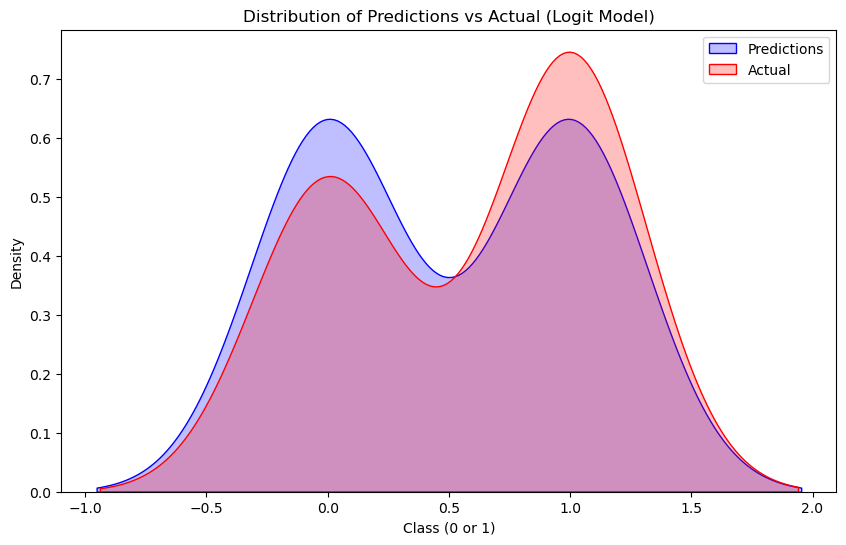

Model: Probit Model
Model accuracy: 0.5833333333333334
Confusion matrix:
[[3 2]
 [3 4]]
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.67      0.57      0.62         7

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



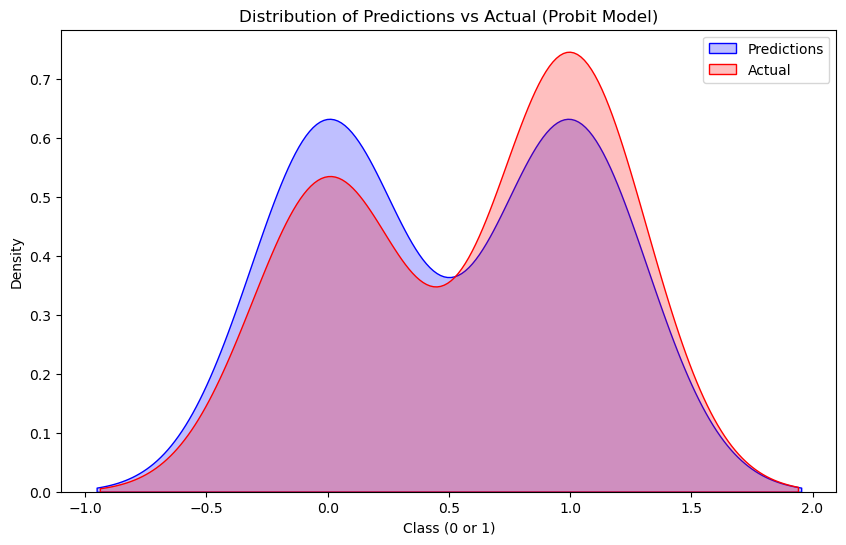

In [72]:
# 8
# Evaluating accuracy and reports for models
def evaluate_model(y_test, y_pred_binary, model_name):
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    class_report = classification_report(y_test, y_pred_binary)
    
    print(f"Model: {model_name}")
    print(f"Model accuracy: {accuracy}")
    print("Confusion matrix:")
    print(conf_matrix)
    print("Classification report:")
    print(class_report)
    
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_pred_binary, color="blue", label="Predictions", fill=True)
    sns.kdeplot(y_test, color="red", label="Actual", fill=True)
    
    plt.xlabel("Class (0 or 1)")
    plt.ylabel("Density")
    plt.title(f"Distribution of Predictions vs Actual ({model_name})")
    plt.legend()
    plt.show()

# Logistic model
logit_model = sm.GLM(y_train, X_train_clear, family=sm.families.Binomial()).fit()
y_pred_logit = logit_model.predict(X_test_clear)
y_pred_logit_binary = [1 if x > 0.5 else 0 for x in y_pred_logit]

# Probit model
probit_model = sm.Probit(y_train, X_train_clear).fit()
y_pred_probit = probit_model.predict(X_test_clear)
y_pred_probit_binary = [1 if x > 0.5 else 0 for x in y_pred_probit]

evaluate_model(y_test, y_pred_logit_binary, "Logit Model")

evaluate_model(y_test, y_pred_probit_binary, "Probit Model")

# Ответы получились одинаковые
### Может быть связанно с отсутствием выбросов

Optimization terminated successfully.
         Current function value: 0.318590
         Iterations 8
Model: Logit Model
Model accuracy: 0.5833333333333334
Confusion matrix:
[[3 2]
 [3 4]]
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.67      0.57      0.62         7

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



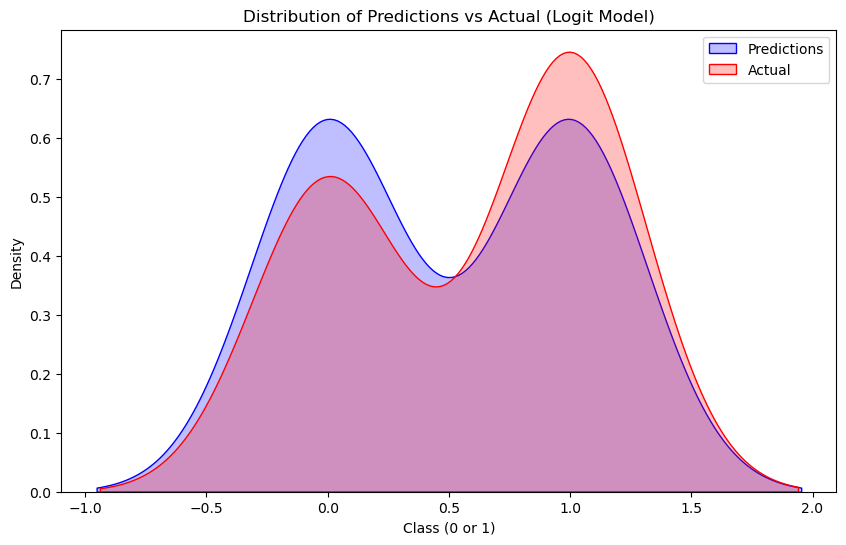

Model: Probit Model
Model accuracy: 0.6666666666666666
Confusion matrix:
[[4 1]
 [3 4]]
Classification report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.80      0.57      0.67         7

    accuracy                           0.67        12
   macro avg       0.69      0.69      0.67        12
weighted avg       0.70      0.67      0.67        12



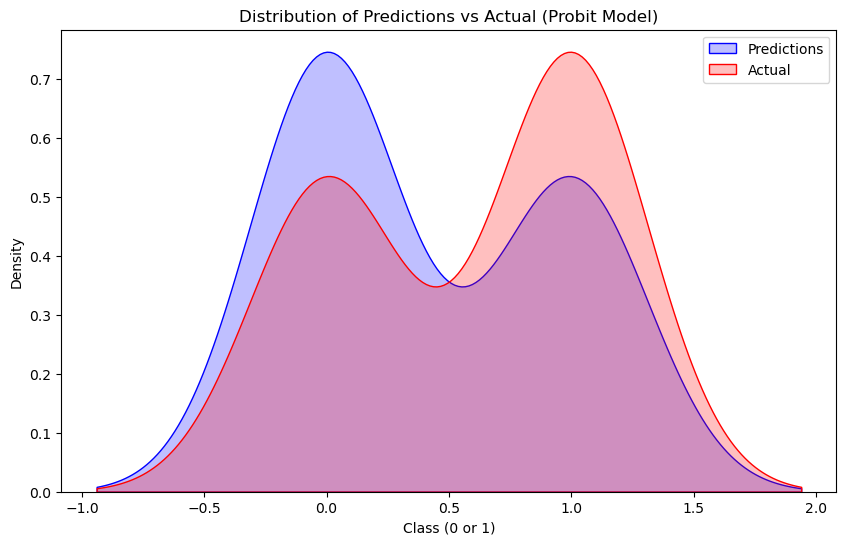

In [73]:
# Evaluating accuracy and reports for models
def evaluate_model(y_test, y_pred_binary, model_name):
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    class_report = classification_report(y_test, y_pred_binary)
    
    print(f"Model: {model_name}")
    print(f"Model accuracy: {accuracy}")
    print("Confusion matrix:")
    print(conf_matrix)
    print("Classification report:")
    print(class_report)
    
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_pred_binary, color="blue", label="Predictions", fill=True)
    sns.kdeplot(y_test, color="red", label="Actual", fill=True)
    
    plt.xlabel("Class (0 or 1)")
    plt.ylabel("Density")
    plt.title(f"Distribution of Predictions vs Actual ({model_name})")
    plt.legend()
    plt.show()

# Logistic model
logit_model = sm.GLM(y_train, X_train_clear, family=sm.families.Binomial()).fit()
y_pred_logit = logit_model.predict(X_test_clear)
y_pred_logit_binary = [1 if x > 0.6 else 0 for x in y_pred_logit]

# Probit model
probit_model = sm.Probit(y_train, X_train_clear).fit()
y_pred_probit = probit_model.predict(X_test_clear)
y_pred_probit_binary = [1 if x > 0.6 else 0 for x in y_pred_probit]

evaluate_model(y_test, y_pred_logit_binary, "Logit Model")

evaluate_model(y_test, y_pred_probit_binary, "Probit Model")

### При изменении порога вероятности на 0.6 для пробит-модели, мы получили более низкие показатели точности

In [74]:
# 9
# 2. Converting probabilities to binary classes with a threshold of 0.5
y_pred_logit_binary = [1 if x > 0.5 else 0 for x in y_pred_logit]
y_pred_probit_binary = [1 if x > 0.5 else 0 for x in y_pred_probit]

# 3. Creating a confusion matrix for the logistic model
conf_matrix_logit = confusion_matrix(y_test, y_pred_logit_binary)
conf_matrix_logit_df = pd.DataFrame(conf_matrix_logit, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("Confusion Matrix for Logit Model:")
print(conf_matrix_logit_df)

# 4. Creating a confusion matrix for the probit model
conf_matrix_probit = confusion_matrix(y_test, y_pred_probit_binary)
conf_matrix_probit_df = pd.DataFrame(conf_matrix_probit, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("\nConfusion Matrix for Probit Model:")
print(conf_matrix_probit_df)

Confusion Matrix for Logit Model:
          Predicted 0  Predicted 1
Actual 0            3            2
Actual 1            3            4

Confusion Matrix for Probit Model:
          Predicted 0  Predicted 1
Actual 0            3            2
Actual 1            3            4


### Эти таблицы показывают количество истинно положительных, истинно отрицательных, ложно положительных и ложно отрицательных предсказаний для каждой модели.

In [75]:
# 10
# Function to calculate sensitivity
def sensitivity(y_true, y_pred_binary):
    cm = confusion_matrix(y_true, y_pred_binary)
    TP = cm[1, 1]
    FN = cm[1, 0]
    return TP / (TP + FN)

# Function to calculate specificity
def specificity(y_true, y_pred_binary):
    cm = confusion_matrix(y_true, y_pred_binary)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

sensitivity_logit = sensitivity(y_test, y_pred_logit_binary)
specificity_logit = specificity(y_test, y_pred_logit_binary)

sensitivity_probit = sensitivity(y_test, y_pred_probit_binary)
specificity_probit = specificity(y_test, y_pred_probit_binary)

print(f"Logit Model: Sensitivity = {sensitivity_logit:.2f}, Specificity = {specificity_logit:.2f}")
print(f"Probit Model: Sensitivity = {sensitivity_probit:.2f}, Specificity = {specificity_probit:.2f}")

Logit Model: Sensitivity = 0.57, Specificity = 0.60
Probit Model: Sensitivity = 0.57, Specificity = 0.60


- **Чувствительность (Sensitivity, также называется Recall или True Positive Rate, TPR)** — это доля правильно предсказанных положительных классов:

$$
\text{Sensitivity} = \frac{TP}{TP + FN}
$$

где:
- $TP$ (True Positives) — истинно положительные предсказания,
- $FN$ (False Negatives) — ложно отрицательные предсказания.

- **Специфичность (Specificity, также называется True Negative Rate, TNR)** — это доля правильно предсказанных отрицательных классов:

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

где:
- $TN$ (True Negatives) — истинно отрицательные предсказания,
- $FP$ (False Positives) — ложно положительные предсказания.

### Эти метрики дают представление о том, насколько хорошо модель справляется с правильной классификацией положительных и отрицательных классов.

### В медицине важную роль играет высокая чувствительность

In [76]:
# 11
def optimalCutoff(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    optimal_idx = np.argmax(tpr - fpr)  # Choosing the threshold that maximizes (TPR - FPR)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold, fpr[optimal_idx], tpr[optimal_idx]

def optimalCutoff_high_sensitivity(y_true, y_scores, target_sensitivity=0.90):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    # Searching for the first threshold where sensitivity >= target_sensitivity
    for i in range(len(tpr)):
        if tpr[i] >= target_sensitivity:
            return thresholds[i], fpr[i], tpr[i]  # Threshold, FPR, TPR
    return None, None, None  # If not found

# 1. Predict probabilities for the test data
y_pred_logit_scores = logit_model.predict(X_test_clear)
y_pred_probit_scores = probit_model.predict(X_test_clear)

# 2. Find the optimal threshold for the logistic model
optimal_threshold_logit, fpr_logit, tpr_logit = optimalCutoff_high_sensitivity(y_test, y_pred_logit_scores)
print(f"Optimal threshold for Logit Model: {optimal_threshold_logit:.2f}")

# 3. Find the optimal threshold for the probit model
optimal_threshold_probit, fpr_probit, tpr_probit = optimalCutoff_high_sensitivity(y_test, y_pred_probit_scores)
print(f"Optimal threshold for Probit Model: {optimal_threshold_probit:.2f}")

# 4. Create a confusion matrix for the logistic model
y_pred_logit_optimal = [1 if x > optimal_threshold_logit else 0 for x in y_pred_logit_scores]
conf_matrix_logit_optimal = confusion_matrix(y_test, y_pred_logit_optimal)
conf_matrix_logit_optimal_df = pd.DataFrame(conf_matrix_logit_optimal, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("Confusion Matrix for Logit Model (Optimal Threshold):")
print(conf_matrix_logit_optimal_df)

# 5. Create a confusion matrix for the probit model
y_pred_probit_optimal = [1 if x > optimal_threshold_probit else 0 for x in y_pred_probit_scores]
conf_matrix_probit_optimal = confusion_matrix(y_test, y_pred_probit_optimal)
conf_matrix_probit_optimal_df = pd.DataFrame(conf_matrix_probit_optimal, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("\nConfusion Matrix for Probit Model (Optimal Threshold):")
print(conf_matrix_probit_optimal_df)

# 6. Calculate sensitivity and specificity for the logistic model
def sensitivity_and_specificity(conf_matrix):
    TN = conf_matrix[0, 0]
    TP = conf_matrix[1, 1]
    FN = conf_matrix[1, 0]
    FP = conf_matrix[0, 1]
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    return sensitivity, specificity

sensitivity_logit_optimal, specificity_logit_optimal = sensitivity_and_specificity(conf_matrix_logit_optimal)
print(f"\nLogit Model: Sensitivity = {sensitivity_logit_optimal:.2f}, Specificity = {specificity_logit_optimal:.2f}")

sensitivity_probit_optimal, specificity_probit_optimal = sensitivity_and_specificity(conf_matrix_probit_optimal)
print(f"Probit Model: Sensitivity = {sensitivity_probit_optimal:.2f}, Specificity = {specificity_probit_optimal:.2f}")

Optimal threshold for Logit Model: 0.06
Optimal threshold for Probit Model: 0.06
Confusion Matrix for Logit Model (Optimal Threshold):
          Predicted 0  Predicted 1
Actual 0            2            3
Actual 1            1            6

Confusion Matrix for Probit Model (Optimal Threshold):
          Predicted 0  Predicted 1
Actual 0            2            3
Actual 1            1            6

Logit Model: Sensitivity = 0.86, Specificity = 0.40
Probit Model: Sensitivity = 0.86, Specificity = 0.40


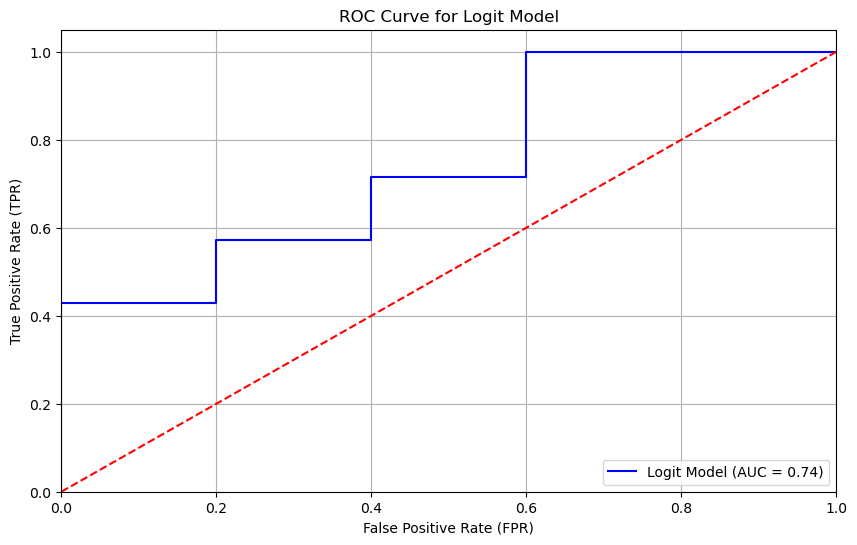

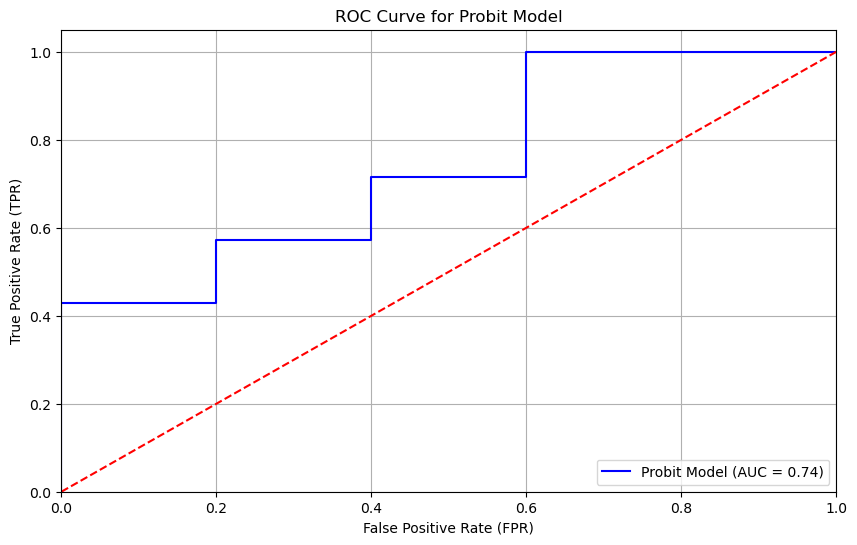

In [77]:
# 13
def plotROC(y_true, y_scores, model_name):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line for random classifier
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plotROC(y_test, y_pred_logit_scores, 'Logit Model')

plotROC(y_test, y_pred_probit_scores, 'Probit Model')

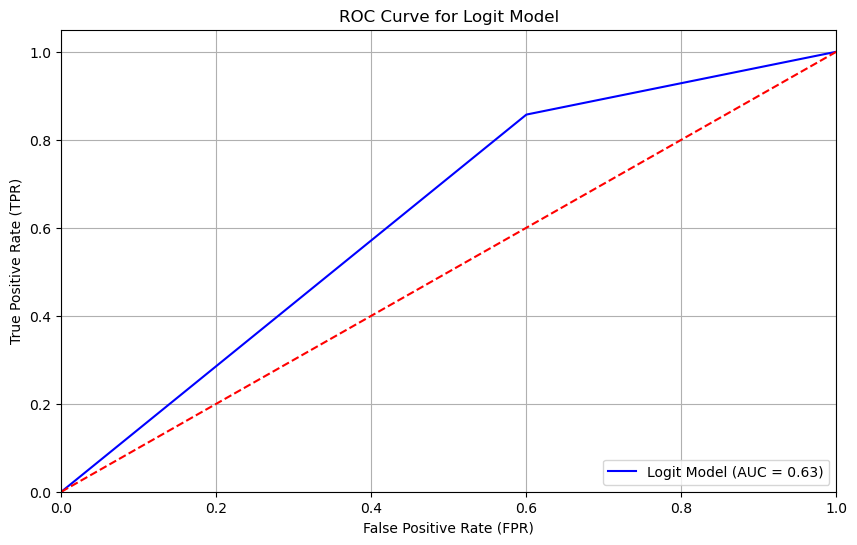

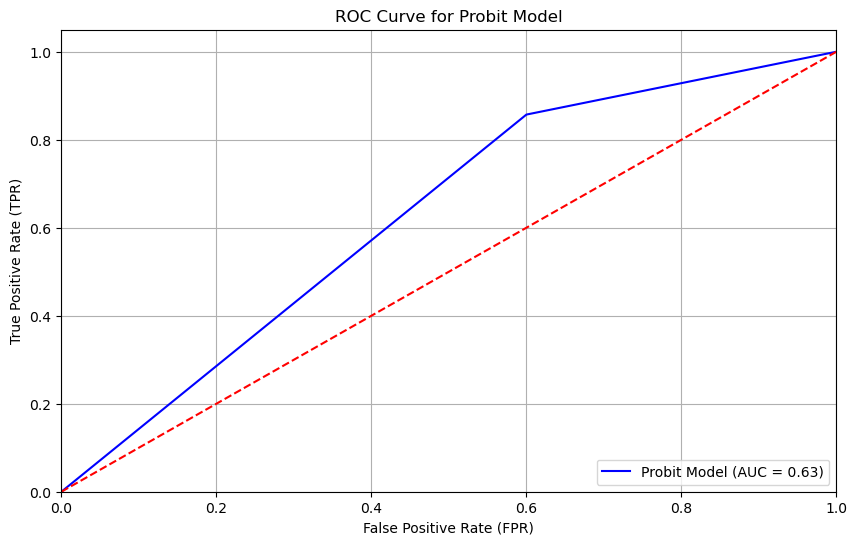

In [78]:
def plotROC(y_true, y_scores, model_name):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line for random classifier
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plotROC(y_test, y_pred_logit_optimal, 'Logit Model')

plotROC(y_test, y_pred_probit_optimal, 'Probit Model')

### 14 уже сделан ранее, так как были признаки которые имели тест Вальда более 0.05 а значит были признаки которые не сильно влияли на общую выборку